area under curve

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import pandas as pd
from scipy.signal import savgol_filter

In [7]:
import resurfemg.helper_functions as hf

In [8]:
array = np.array([0,1,1,1,1,10,1,2,3,4,10,4,1,0,0,0,0])
array1 = np.hstack((array, array))
#array2 = np.hstack((array, array))
array2 = np.hstack(( array1, np.array([20,20,20])))
array = np.hstack((array2, array1))

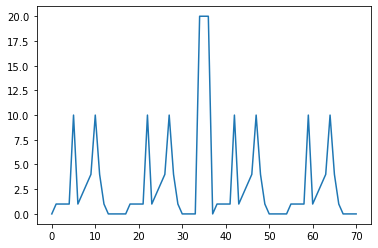

In [9]:
plt.plot(array)

In [10]:
def hi_envelope(our_signal, dmax=24):
    """
    Takes a 1d signal array, and extracts 'high'envelope,
    then makes high envelope, based on connecting peaks
    dmax: int, size of chunks,

    :param our_signal: 1d signal array usually of emg
    :type our_signal: ~numpy.ndarray
    :param dmax: legnth of chunk to look for local max in
    :type dmax: int

    :returns: src_signal_gated, the gated result
    :rtype: ~numpy.ndarray
    """
    # locals max is lmax
    lmax = (np.diff(np.sign(np.diff(our_signal))) < 0).nonzero()[0] + 1
    lmax = lmax[
        [i+np.argmax(
            our_signal[lmax[i:i+dmax]]
        ) for i in range(0, len(lmax), dmax)]
    ]
    smoothed = savgol_filter(our_signal[lmax], 3, 2)
    smoothed_interped = signal.resample(smoothed, len(our_signal))

    return smoothed_interped



In [26]:
def area_under_curve(array, start_index, end_index, end_curve= 0, smooth_algorithm='none'):
    """
    This algorithm should be applied to breaths longer than 60 values on an index. 
    The mid_savgol assumes a parabolic fit. It is reccomended to test a smoothing
    algorithm first, apply, then run the area_under the curve with None for smooth_algortihm.
    
    """
    new_array = array[start_index: (end_index+1)]
    #new_array = abs(new_array)
    max_ind =(new_array.argmax())
    max_val = new_array[max_ind]
    end_curve = end_curve/100
    if smooth_algorithm == 'none':
        absolute_val_array = np.abs(new_array[max_ind:] - new_array.max() * end_curve)
        smallest_difference_index = absolute_val_array.argmin()
        smallest_difference_index = smallest_difference_index + max_ind
        area = np.sum(new_array[:smallest_difference_index]) 
    if smooth_algorithm == 'mid_savgol':
        new_array = savgol_filter(new_array, int(len(new_array)), 2, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)
        absolute_val_array = np.abs(new_array[max_ind:] - new_array.max() * end_curve)
        smallest_difference_index = absolute_val_array.argmin()
        smallest_difference_index = smallest_difference_index + max_ind
        area = np.sum(new_array[:smallest_difference_index]) 
        plt.plot(new_array)
        plt.plot(new_array[:smallest_difference_index])
    return area    

In [27]:
new_array = array [start_index: end_index]
new_array

array([ 0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,  0,  0,  0,
        0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,  0,  0,  0,
       20, 20, 20,  0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  1, 10])

169.51196675642558

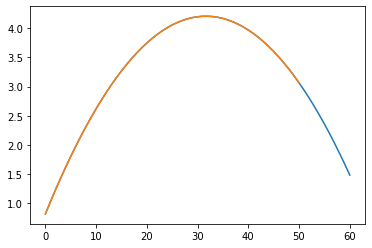

In [28]:
start_index = 0
end_index = 60
area_under_curve(array, start_index, end_index, 70, smooth_algorithm='mid_savgol')

In [ ]:
moother = savgol_filter(new_array, int(len(new_array)/5), 1, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)
plt.plot(moother)
plt.show()

In [ ]:
moother